# Stock Advisor

A simple to use notebook to help you stay informed on stocks and current trends

In [11]:
#Import lots of stuff
import heapq
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import pandas_datareader as pdr
import datetime
from statistics import mode

#trying new plotting library
from bokeh.plotting import figure, output_file, show

## Part 1: The simple moving average
Simple moving average analysis of stocks. Best for trending markets (not sidways/violate markets)

This is a Simple Moving Crossover Trading Strategy (Momentum class of strategies)
The code comes from part of the tutorial form this website:
https://www.datacamp.com/community/tutorials/finance-python-trading#tradingstrategy


In [15]:
import pandas_datareader.data as web
    

# get Stock data
ticker = 'MSFT'
startDate = datetime.datetime(2017, 6, 19)
endDate = datetime.datetime(2018, 6, 1)

# Import stock data
df = pdr.get_data_quandl(ticker, start=startDate, end=endDate)
df = df.reindex(index=df.index[::-1])

In [16]:
# get Crypto data

In [17]:
df.head()

,Open,High,Low,Close,Volume,ExDividend,SplitRatio,AdjOpen,AdjHigh,AdjLow,AdjClose,AdjVolume
Date,,,,,,,,,,,,
2017-06-19,70.50,70.945,70.35,70.87,23146852.0,0.0,1.0,69.773322,70.213736,69.624869,70.139509,23146852.0
2017-06-20,70.82,70.870,69.87,69.91,20775590.0,0.0,1.0,70.090024,70.139509,69.149816,69.189404,20775590.0
2017-06-21,70.21,70.620,69.94,70.27,19190623.0,0.0,1.0,69.486312,69.892086,69.219095,69.545693,19190623.0
2017-06-22,70.54,70.590,69.71,70.26,22222851.0,0.0,1.0,69.812910,69.862395,68.991465,69.535796,22222851.0
2017-06-23,70.09,71.250,69.92,71.21,23176418.0,0.0,1.0,69.367549,70.515592,69.199301,70.476004,23176418.0


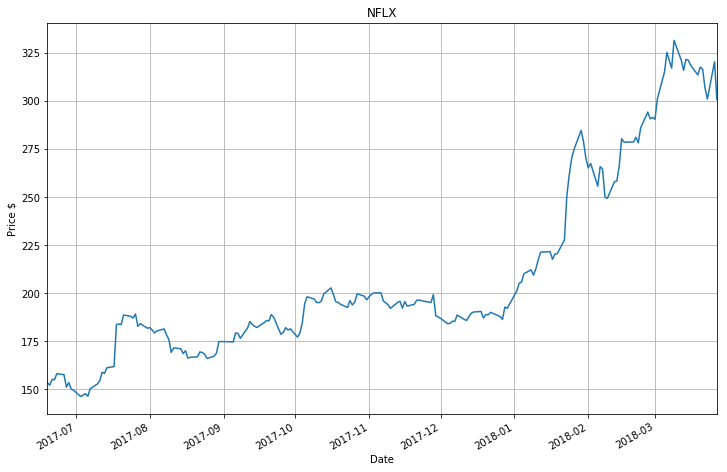

In [10]:
# Plot the closing prices for `aapl`
df['Close'].plot(grid=True,figsize=(12,8))
plt.title(ticker)
plt.ylabel('Price $')

# Show all of the data
plt.show()

#other plotting style
#p = figure(title=ticker,x_axis_type='datetime',y_axis_label='Price $')
#p.line(df.index.values,df['Close'])
#show(p)

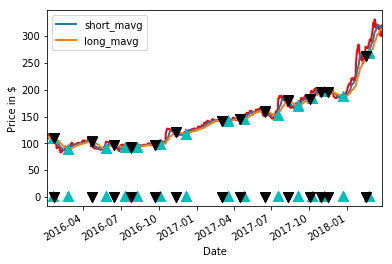

In [34]:
# Initialize the short and long windows
short_window = 10
long_window = 20

# Initialize the `signals` DataFrame with the `signal` column
signals = pd.DataFrame(index=df.index)
signals['signal'] = 0.0

# Create short simple moving average over the short window
signals['short_mavg'] = df['Close'].rolling(window=short_window, min_periods=1, center=False).mean()

# Create long simple moving average over the long window
signals['long_mavg'] = df['Close'].rolling(window=long_window, min_periods=1, center=False).mean()

# Create signals
signals['signal'][short_window:] = np.where(signals['short_mavg'][short_window:] > signals['long_mavg'][short_window:], 1.0, 0.0)   

# Generate trading orders
signals['positions'] = signals['signal'].diff()

# Plot
fig = plt.figure()
ax1 = fig.add_subplot(111,  ylabel='Price in $')

df['Close'].plot(ax=ax1, color='r', lw=2.)
signals[['short_mavg', 'long_mavg']].plot(ax=ax1, lw=2.)

# Plot the buy signals
ax1.plot(signals.loc[signals.positions == 1.0].index,
         signals.loc[signals.positions == 1.0],
         "^", markersize=10, color="c")
         
# Plot the sell signals
ax1.plot(signals.loc[signals.positions == -1.0].index,
         signals.loc[signals.positions == -1.0],
         "v", markersize=10, color="k")
         
plt.show()

In [26]:
signals.tail(20)

,signal,short_mavg,long_mavg,positions
Date,,,,
2018-02-28,1.0,92.887,91.5930,0.0
2018-03-01,1.0,93.091,91.4850,0.0
2018-03-02,1.0,93.130,91.4245,0.0
2018-03-05,1.0,93.294,91.5175,0.0
2018-03-06,1.0,93.354,91.7310,0.0
2018-03-07,1.0,93.591,91.8575,0.0
2018-03-08,1.0,93.860,92.0985,0.0
2018-03-09,1.0,94.108,92.6810,0.0
2018-03-12,1.0,94.243,93.1145,0.0


In [27]:
# Bohek plot
p = figure(title=ticker,x_axis_type='datetime',y_axis_label='Price $')
p.line(df.index.values,df['Close'],color = 'red')
p.line(df.index.values,signals['short_mavg'], color = 'green')
p.line(df.index.values,signals['long_mavg'], color ='blue')
#need to figure out how to add the buy and sell signals
#p.circle(signals.loc[signals.positions == 1.0].index,
#         signals.loc[signals.positions == 1.0],size=30, color="green", alpha=0.5)
#p.circle(signals.loc[signals.positions == -1.0].index,
#         signals.loc[signals.positions == -1.0],size=30, color="red", alpha=0.5)
show(p)

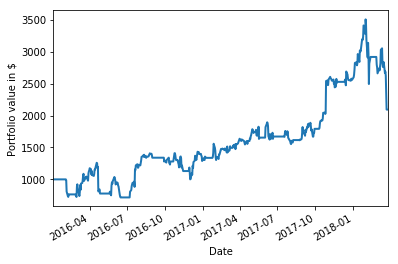

In [53]:
#Back tester
# Set the initial capital
initial_capital= float(1000.0)

# Create a DataFrame `positions`
positions = pd.DataFrame(index=signals.index).fillna(0.0)

# Buy a 100 shares
positions[ticker] = 100*signals['signal']   
  
# Initialize the portfolio with value owned   
portfolio = positions.multiply(df['AdjClose'], axis=0)

# Store the difference in shares owned 
pos_diff = positions.diff()

# Add `holdings` to portfolio
portfolio['holdings'] = (positions.multiply(df['AdjClose'], axis=0)).sum(axis=1)

# Add `cash` to portfolio
portfolio['cash'] = initial_capital - (pos_diff.multiply(df['AdjClose'], axis=0)).sum(axis=1).cumsum()   

# Add `total` to portfolio
portfolio['total'] = portfolio['cash'] + portfolio['holdings']

# Add `returns` to portfolio
portfolio['returns'] = portfolio['total'].pct_change()


import matplotlib.pyplot as plt

fig = plt.figure()

ax1 = fig.add_subplot(111, ylabel='Portfolio value in $')

# Plot the equity curve in dollars
portfolio['total'].plot(ax=ax1, lw=2.)

# Plot the "buy" trades against the equity curve
#ax1.plot(portfolio.loc[signals.positions == 1.0].index, 
#         portfolio.total[signals.positions == 1.0],
#        '^', markersize=10, color='m')

# Plot the "sell" trades against the equity curve
#ax1.plot(portfolio.loc[signals.positions == -1.0].index, 
#         portfolio.total[signals.positions == -1.0],
#         'v', markersize=10, color='k')

# Show the plot
plt.show()

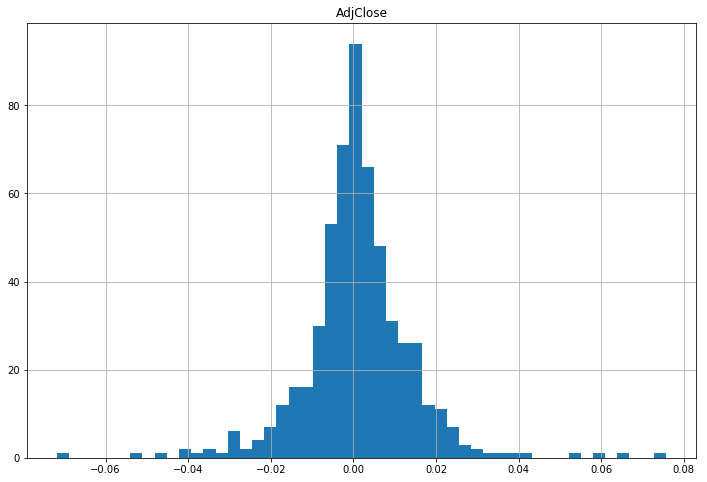

Average daily percent change: AdjClose    0.001049
dtype: float64


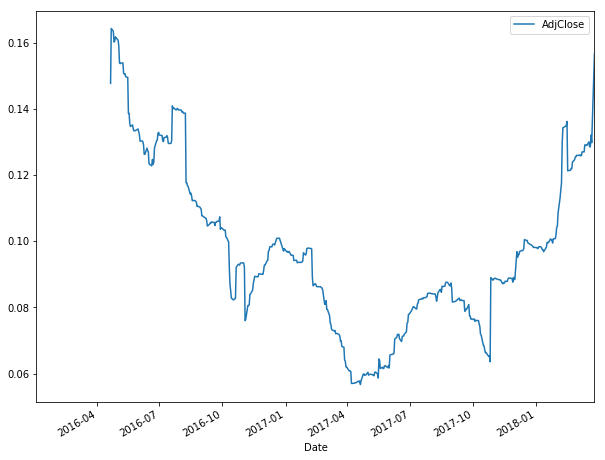

In [28]:
#Calculate volitity NEEDS TO BE COMPARED TO SOMETHING (PROBABLY DOW AVERAGE)

daily_close_px = df[['AdjClose']]

# Calculate the daily percentage change for `daily_close_px`
daily_pct_change = daily_close_px.pct_change()

# Plot the distributions
daily_pct_change.hist(bins=50, sharex=True, figsize=(12,8))

# Show the resulting plot
plt.show()
print('Average daily percent change:',daily_pct_change.mean())

# Define the minumum of periods to consider 
min_periods = 75 

# Calculate the volatility
vol = daily_pct_change.rolling(min_periods).std() * np.sqrt(min_periods) 

# Plot the volatility
vol.plot(figsize=(10, 8))

# Show the plot
plt.show()

### Evaluating strategy
1. Sharpe Ratio:
1 is ok, 2 is very good and 3 is excellent. (according to tutorial)
2. Maximum Drawdown:
measure of the largest single drop from peak to bottom
3. Compound Annual Growth Rate (CAGR): What you actual made over the time period as if a constant rate

0.826188290036595


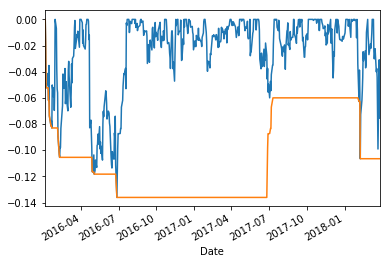

0.27127566784178114


In [64]:
# Isolate the returns of your strategy
returns = portfolio['returns']

# annualized Sharpe ratio
sharpe_ratio = np.sqrt(252) * (returns.mean() / returns.std())

# Print the Sharpe ratio
print(sharpe_ratio)

# Define a trailing 252 trading day window
window = 252

# Calculate the max drawdown in the past window days for each day
rolling_max = df['AdjClose'].rolling(window, min_periods=1).max()
daily_drawdown = df['AdjClose']/rolling_max - 1.0

# Calculate the minimum (negative) daily drawdown
max_daily_drawdown = daily_drawdown.rolling(window, min_periods=1).min()

# Plot the results
daily_drawdown.plot()
max_daily_drawdown.plot()

# Show the plot
plt.show()

#Compound Annual Growth Rate

days = (df.index[-1] - df.index[0]).days
cagr = ((((df['AdjClose'][-1]) / df['AdjClose'][1])) ** (365.0/days)) - 1
print(cagr)